In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

movies=pd.read_csv('/home/tomasz/Desktop/tmdb_movies.csv')
genres=pd.read_csv('/home/tomasz/Desktop/tmdb_genres.csv')

In [3]:
genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [4]:
movies.head(3)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0


## 1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [5]:
movies.describe()

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4775.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,634.411309
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,2415.010323
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,18.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,28.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,35.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,10770.000000


In [6]:
top_ten=movies[movies['vote_count']>737].sort_values(by='vote_average',ascending=False).head(10)
top_ten['original_title'].unique()

array(['The Shawshank Redemption', 'The Godfather', '千と千尋の神隠し',
       'Whiplash', 'The Godfather: Part II', 'Pulp Fiction',
       "Schindler's List", 'Fight Club', 'Psycho', 'GoodFellas'],
      dtype=object)

## 2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [7]:
movies['release_date']= pd.to_datetime(movies['release_date'])

In [8]:
movies['release_date'].dt.year.head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4    2012.0
Name: release_date, dtype: float64

In [9]:
# filt=(movies['release_date'].dt.year>=2010) & (movies['release_date'].dt.year<=2016)

In [11]:
revenue_years={x:0 for x in np.arange(2010,2017)}
revenue_years

{2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0}

In [12]:
for year in revenue_years:
    revenue_years[year]=round(movies.loc[(movies['release_date'].dt.year==year),'revenue'].mean(),2)

In [13]:
revenue_years

{2010: 90438110.08,
 2011: 92004130.76,
 2012: 116065914.64,
 2013: 101348455.82,
 2014: 101346599.11,
 2015: 105439926.95,
 2016: 139049586.04}

In [14]:
budget_years={x:0 for x in np.arange(2010,2017)}

In [15]:
for year in budget_years:
    budget_years[year]=round(movies.loc[(movies['release_date'].dt.year==year),'budget'].mean(),2)

In [16]:
budget_years

{2010: 34495410.94,
 2011: 34772320.34,
 2012: 34922031.99,
 2013: 35523293.65,
 2014: 30959887.86,
 2015: 31132163.74,
 2016: 45703269.23}

In [17]:
x_years=revenue_years.keys()
y_revenue=revenue_years.values()
y_revenue=[round((x*1e-6),2) for x in y_revenue]

In [18]:
y_budget=budget_years.values()
y_budget=[round((x*1e-6),2) for x in y_budget]



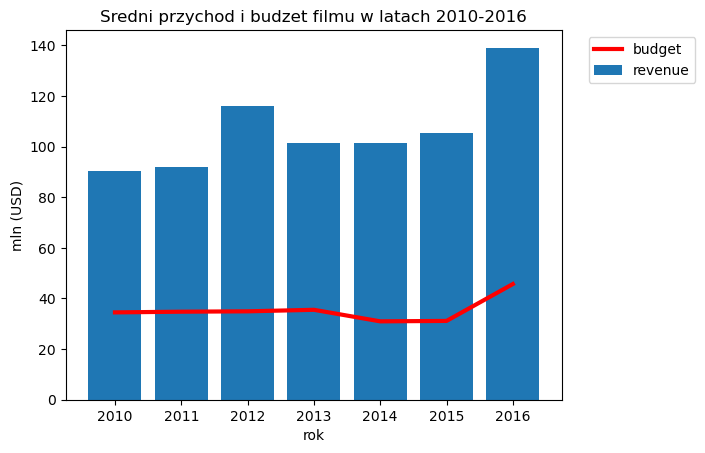

In [19]:
plt.bar(x_years,y_revenue,label='revenue')
plt.plot(x_years,y_budget,c='red',lw=3,label='budget')
plt.title('Sredni przychod i budzet filmu w latach 2010-2016')
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('mln (USD)')
plt.xlabel('rok')
plt.show()

## 3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [20]:
genres.columns

Index(['Unnamed: 0', 'genres'], dtype='object')

In [21]:
genres.rename(columns={'Unnamed: 0':'genre_id'},inplace=True)

In [22]:
genres.head(3)

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy


In [23]:
movies=pd.merge(movies,genres,on="genre_id")

In [26]:
movies.head(3)

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action


 ## 4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [27]:
movies['genres'].value_counts()

genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: count, dtype: int64

Najczesciej pojawiaja sie dramaty i jest 1207 filmow tego gatunku

## Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [31]:
genres_movies=movies.groupby(['genres'])

In [37]:
genres_movies['runtime'].mean().sort_values(ascending=False)

genres
History            133.960000
War                126.125000
Western            117.925926
Drama              115.521559
Adventure          113.061947
Crime              112.143590
TV Movie           110.500000
Action             109.058355
Science Fiction    109.031250
Romance            107.094340
Fantasy            106.487179
Thriller           105.690722
Music              102.852941
Mystery            100.609756
Comedy             100.464491
Horror              94.753333
Documentary         93.511364
Family              89.803571
Animation           89.552846
Foreign             83.000000
Name: runtime, dtype: float64

Najdluzej trwaja filmy historyczne

## 6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<Axes: ylabel='Frequency'>

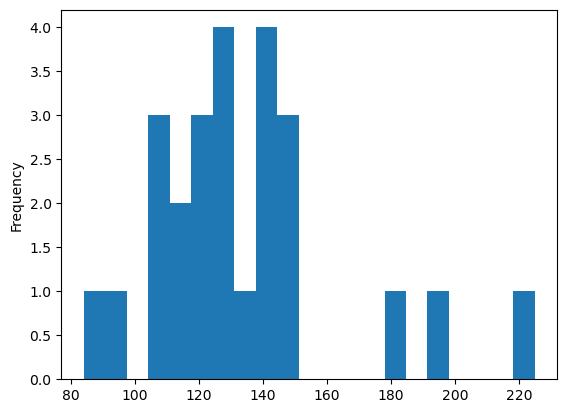

In [57]:
bin_no=movies.loc[movies['genres']=='History','runtime'].nunique()
movies.loc[movies['genres']=='History','runtime'].plot(kind='hist',bins=bin_no)

In [59]:
movies.loc[movies['genres']=='History','runtime']

3928    183.0
3929    140.0
3930    149.0
3931    134.0
3932    192.0
3933    130.0
3934    140.0
3935    144.0
3936    128.0
3937    124.0
3938    127.0
3939    128.0
3940    120.0
3941    113.0
3942    105.0
3943    120.0
3944    150.0
3945    117.0
3946    110.0
3947    145.0
3948    110.0
3949    139.0
3950     92.0
3951    225.0
3952     84.0
Name: runtime, dtype: float64